<a href="https://colab.research.google.com/github/nitinlodhi019/Machine-Learning/blob/main/Regularization/Ridge_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# for 1D

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

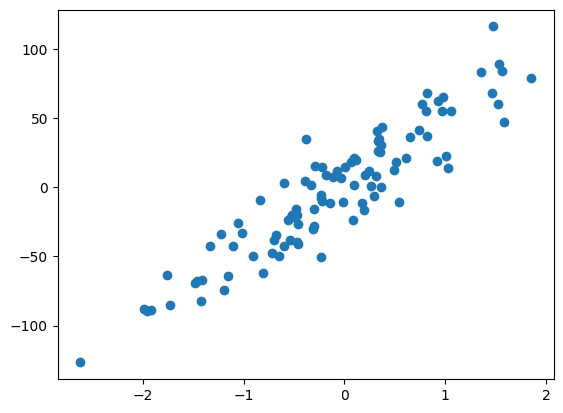

In [ ]:
X, y = make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 20, n_informative = 1, random_state = 42)
plt.scatter(X, y)
plt.show()

In [ ]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


In [ ]:
# simple LinearReg (alpha=0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[47.13323967]
2.3302306410539453


In [ ]:
# alpha = 10
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[41.9906212]
1.7961876226164746


In [ ]:
# alpha = 100
rr1 = Ridge(alpha = 100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[21.18627364]
-0.3642714175995887


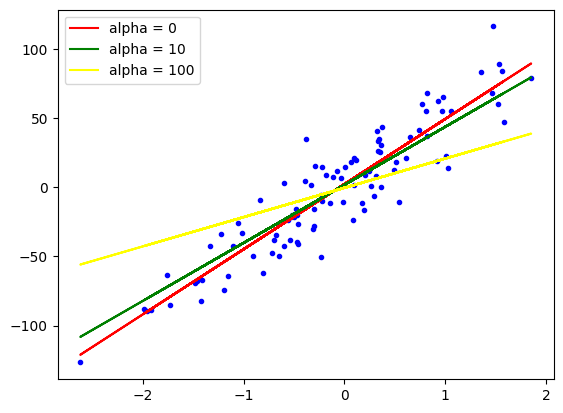

In [ ]:
plt.plot(X, y, 'b.')
plt.plot(X, lr.predict(X), color = 'red', label='alpha = 0')
plt.plot(X, rr.predict(X), color = 'green', label='alpha = 10')
plt.plot(X, rr1.predict(X), color = 'yellow', label='alpha = 100')
plt.legend()
plt.show()

In [ ]:
class MeraRidge:

    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())

        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)

    def predict(X_test):
        pass

In [ ]:
reg = MeraRidge(alpha=100)


In [ ]:
reg.fit(X,y)


[21.18627364] [-0.36427142]


# For ND

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
X,y = load_diabetes(return_X_y=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1,solver='cholesky')
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [ ]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [ ]:
print(reg.coef_)
print(reg.intercept_)


[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [ ]:
class MeraRidge:

    def __init__(self,alpha=0.1):

        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):

        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [ ]:
reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.8905342560281
